<a href="https://colab.research.google.com/github/AndreNasci/ECO904/blob/main/07_(Em_Sala)_Intro_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Aprendizado Profundo

Imagens geradas por IA:

<img src="https://t.ctcdn.com.br/BfbrGpmHER4KkagiccfsUO7a5ho=/720x405/smart/filters:format(webp)/i713984.jpeg" />

<img src="https://s2.glbimg.com/3WMP7E3cAurQulIDkCUEtPL3I_c=/0x0:1024x1024/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2023/Z/K/rLjLsBTX2slgMPgXqFqw/frswiwrxwaai6qq.jpeg" width="600px" />


[Linux by Balenciaga](https://youtu.be/zpVD24fBI7g)

Vídeo Gerado por IA:

[Propaganda de Pizzaria](https://9gag.com/photo/aYVD8Wx_460sv.mp4)

[Trump Goes Fishing, Catches an Octopus and Cooks It](https://youtu.be/h0UUhUZ7mkE)


Ativar no menu do Colab:
- Ambiente de execução
  - Alterar tipo de ambiente de execução
    - Uso de GPU ou TPU

**Exemplos Keras: **

https://keras.io/examples/vision/

# Classificador MNIST com Aprendizado Profundo

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


## Base de Dados

In [ ]:
# Tipos de camadas importadas do keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

# Importando dataset
mnist = tf.keras.datasets.mnist

# Separando dados de treino e de teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalização

# Inserindo dimensão adicional
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

#agrupar e embaralhar o conjunto de dados
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Modelo da Rede Profunda

In [ ]:
# classe MyModel é filha de Model, importada do tf
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()

    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [ ]:
model.__dict__

In [ ]:
from tensorflow.keras import Sequential

x = Sequential([
    Conv2D(32, 3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10)
])
x.build((32,28,28,1))
x.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (32, 26, 26, 32)          320       
                                                                 
 flatten_1 (Flatten)         (32, 21632)               0         
                                                                 
 dense_2 (Dense)             (32, 128)                 2769024   
                                                                 
 dense_3 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


## Treinamento

### Otimizador de Treinamento

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

### Métricas de Otimização e Validação

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### Passo de Treinamento

In [ ]:
@tf.function
def train_step(images, labels):

  with tf.GradientTape() as tape:
    # training=True só é necessário se houver camadas com diferentes
    # comportamento durante o treinamento versus inferência (por exemplo, Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(images, labels):
  # training=True só é necessário se houver camadas com diferentes
  # comportamento durante o treinamento versus inferência (por exemplo, Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

### Treinamento

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.1308353990316391, Accuracy: 96.10333251953125, Test Loss: 0.0618010088801384, Test Accuracy: 97.87999725341797
Epoch 2, Loss: 0.04012171924114227, Accuracy: 98.71666717529297, Test Loss: 0.06081961840391159, Test Accuracy: 98.04000091552734
Epoch 3, Loss: 0.019323814660310745, Accuracy: 99.37166595458984, Test Loss: 0.05254754051566124, Test Accuracy: 98.25
Epoch 4, Loss: 0.013094739988446236, Accuracy: 99.56999969482422, Test Loss: 0.05982445925474167, Test Accuracy: 98.22999572753906
Epoch 5, Loss: 0.007256273180246353, Accuracy: 99.73999786376953, Test Loss: 0.07194215059280396, Test Accuracy: 98.0999984741211


In [ ]:
for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.007321821991354227, Accuracy: 99.74832916259766, Test Loss: 0.07291685789823532, Test Accuracy: 98.27999877929688
Epoch 2, Loss: 0.004863716196268797, Accuracy: 99.84333801269531, Test Loss: 0.07163689285516739, Test Accuracy: 98.38999938964844
Epoch 3, Loss: 0.004526935517787933, Accuracy: 99.84166717529297, Test Loss: 0.07189249992370605, Test Accuracy: 98.27999877929688
Epoch 4, Loss: 0.003991817589849234, Accuracy: 99.86499786376953, Test Loss: 0.06322993338108063, Test Accuracy: 98.5999984741211
Epoch 5, Loss: 0.0028089124243706465, Accuracy: 99.90333557128906, Test Loss: 0.09786021709442139, Test Accuracy: 98.13999938964844


In [ ]:
model.save('mnist_net.tf',save_format="tf")

In [ ]:
from keras.models import load_model
inferidor = load_model('mnist_net.tf')

for test_images, test_labels in test_ds :
  y_pred = inferidor(test_images)
  break

y_pred[5]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-10.516045 ,  17.764292 ,  -5.7312603, -20.873909 ,  -7.633141 ,
       -14.290304 ,  -3.9925842,  -3.344146 ,  -6.727666 ,  -9.6704645],
      dtype=float32)>

In [ ]:
y_pred[1]

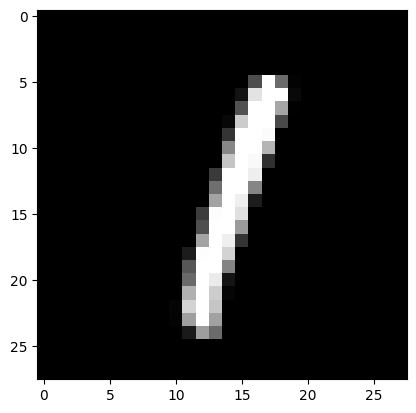

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure
plt.imshow(test_images[1], cmap='gray')
plt.show()

https://www.tensorflow.org/tutorials/keras/text_classification?hl=pt-br